# Week 8 - Advanced Machine Learning

During the course we have covered a variety of different tasks and algorithms. These were chosen for their broad applicability and ease of use with many important techniques and areas of study skipped. The goal of this class is to provide a brief overview of some of the latest advances and areas that could not be covered due to our limited time.

## Active learning

Active learning is related to semi-supervised learning, with active learning being a more iterative process. The algorithm chooses which samples to request labels for. This can be a very useful approach when many samples are available but labelling them is expensive.

The goal with active learning is to choose a set of samples to label that would most improve the performance of the model. There are a variety of different ways the samples can be chosen:

* Distributed across the feature space
* Uncertainty
* Disagreement between multiple models
* Potential for model change
* . . . and many others

Examples can be found in [compound screening](http://www.ncbi.nlm.nih.gov/pubmed/26840049), [data mapping](http://www.ncbi.nlm.nih.gov/pubmed/26793094), and [study categorization](http://www.ncbi.nlm.nih.gov/pubmed/26262175).

We will look at a simple example of distributing training examples across the feature space . . .

In [1]:
from sklearn import datasets, decomposition

diabetes = datasets.load_diabetes()

X = diabetes.data
y = diabetes.target

In [2]:
pca = decomposition.PCA()
pca.fit(X)
transformed = pca.transform(X)
print(transformed.shape)

(442, 10)


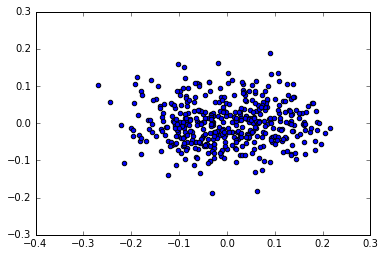

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(transformed[:,0], transformed[:,1])
plt.show()

In [4]:
from sklearn import cluster

kmeans = cluster.KMeans(8)

kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [5]:
kmeans.cluster_centers_.shape

(8, 10)

In [7]:
import numpy as np
centers = []
for i in range(kmeans.cluster_centers_.shape[0]):
    difference = (X - kmeans.cluster_centers_[i]) ** 2
    difference = difference.sum(axis=1)
    #print(difference.shape)
    centers.append(np.argmin(difference))
print(centers)

[314, 81, 393, 240, 100, 306, 386, 203]


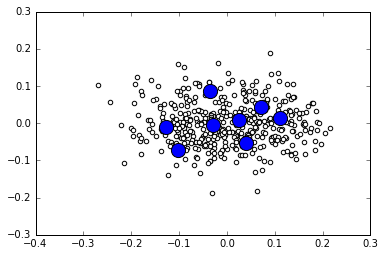

In [8]:
plt.scatter(transformed[:,0], transformed[:,1], color='w', edgecolor='k')
plt.scatter(transformed[centers,0], transformed[centers,1], s=200)
plt.show()

In [12]:
# Demonstration of array wide arithmetic without loops
import numpy as np

a = np.array([1,2,3])
print(a, a+5)

[1 2 3] [6 7 8]


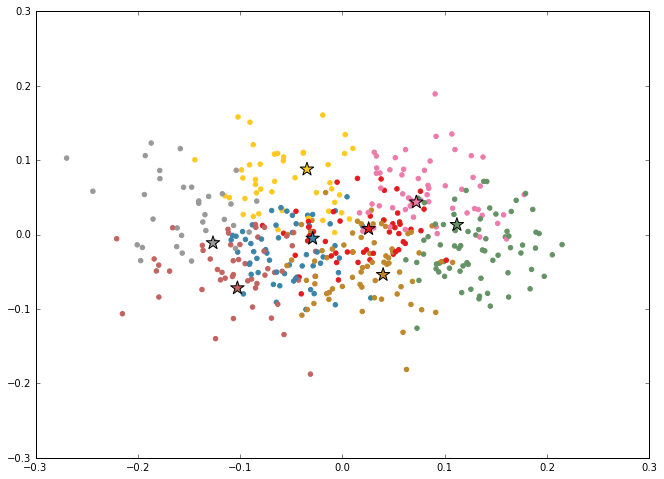

In [14]:
# Improvement on above figure?

fig, ax = plt.subplots(1,1, figsize=(11,8))

color_scale = np.linspace(0, 1, len(set(kmeans.labels_)))

ax.scatter(transformed[:,0], transformed[:,1], 
           color= [plt.cm.Set1(color_scale[i]) for i in kmeans.labels_], )

ax.scatter(transformed[centers,0], transformed[centers,1], 
            color = [plt.cm.Set1(color_scale[i]) for i in range(8)], 
            marker='*', s=200, edgecolors='k')

plt.show()

In [25]:
# Putting everything together and looking at performance

from sklearn.cross_validation import train_test_split
from sklearn import linear_model, metrics

starting_points = 8

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Assessing performance without active learning
clf = linear_model.LinearRegression()

clf.fit(X_train[:starting_points], y_train[:starting_points])

y_predicted = clf.predict(X_test)
print('Eight randomly chosen points gives an error =', metrics.mean_squared_error(y_test, y_predicted))


# Now with active learning
kmeans = cluster.KMeans(starting_points)
kmeans.fit(X_train)

centers = []
for i in range(kmeans.cluster_centers_.shape[0]):
    difference = (X_train - kmeans.cluster_centers_[i]) ** 2
    difference = difference.sum(axis=1)
    centers.append(np.argmin(difference))


clf = linear_model.LinearRegression()

clf.fit(X_train[centers], y_train[centers])

y_predicted = clf.predict(X_test)
print('Eight evenly distributed points gives an error =', metrics.mean_squared_error(y_test, y_predicted))

Eight randomly chosen points gives an error = 35339.0476554
Eight evenly distributed points gives an error = 14825.2875989


## Deep learning

![Basic neural network](files/Colored_neural_network.png)

Although there is a neural network available on the [development version of scikit learn](http://scikit-learn.org/dev/modules/neural_networks_supervised.html) it only runs on the CPU making the large neural networks now popular prohibitively slow. Fortunately, there are a number of different packages available for python that can run on a GPU. 

[Theano](https://github.com/Theano/Theano) is the GPGPU equivalent of numpy. It implements all the core functionality needed to build a deep neural network, and run it on the GPGPU, but does not come with an existing implementation.

A variety of packages have been built on top of Theano that enable neural networks to be implemented in a relatively straightforward manner. Parrallels can be draw with the relationship between numpy and scikit learn. [Pylearn2](http://deeplearning.net/software/pylearn2/) has been around for a number of years but has been somewhat superseded by a number of new packages, including [blocks](https://blocks.readthedocs.org/en/latest), [keras](http://keras.io/), and [lasagne](https://lasagne.readthedocs.org/en/latest).

You may have also heard of [TensorFlow](http://tensorflow.org/) that was released by Google a year or two ago. TensorFlow lies somewhere between the low-level Theano and the high-level packages such as blocks, keras, and lasagne. Currently only keras supports TensorFlow as an alternative backend.

Installing these packages with support for executing code on the GPU is more challenging than simply `conda install ...` or `pip install ...`. In addition to installing these packages it is also necessary to install the CUDA packages. 

Beyond the advances due to the greater computational capacity available on the GPU there have been a number of other important approaches utilized:

* [Convolutional neural nets](http://colah.github.io/posts/2014-07-Conv-Nets-Modular/)
* [Recurrent neural nets](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
* Dropout
* Early stopping
* Data augmentation

![Convolutional neural network architecture](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)
[Aphex34](https://commons.wikimedia.org/w/index.php?title=User:Aphex34&action=edit&redlink=1) via wikimedia.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


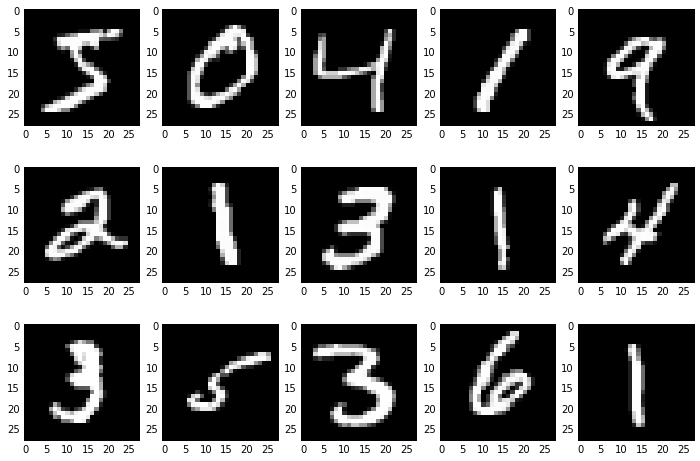

In [2]:
fig, axes = plt.subplots(3,5, figsize=(12,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], interpolation='nearest')
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

batch_size = 512
nb_classes = 10
nb_epoch = 3

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [4]:
model = Sequential()

#model.add(Convolution2D(8, 1, 3, 3, input_shape=(1,28,28), activation='relu'))
model.add(Convolution2D(4, 3, 3, input_shape=(1,28,28), activation='relu'))
#model.add(Convolution2D(4, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4, input_dim=4*28*28*0.25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.fit(X_train[:1024], Y_train[:1024], batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, 
          validation_data=(X_test, Y_test))

Train on 1024 samples, validate on 10000 samples
Epoch 1/3
1024/1024 [==============================] - 1097s - loss: 2.3856 - val_loss: 2.3192
Epoch 2/3
1024/1024 [==============================] - 915s - loss: 2.3827 - val_loss: 2.3109
Epoch 3/3
1024/1024 [==============================] - 893s - loss: 2.3587 - val_loss: 2.3034


C:\Users\stree\Anaconda3\lib\site-packages\keras\models.py:580: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


In [5]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)

Test score: 2.30337825203


C:\Users\stree\Anaconda3\lib\site-packages\keras\models.py:621: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


In [6]:
predictions = model.predict_classes(X_test)

10000/10000 [==============================] - 713s   


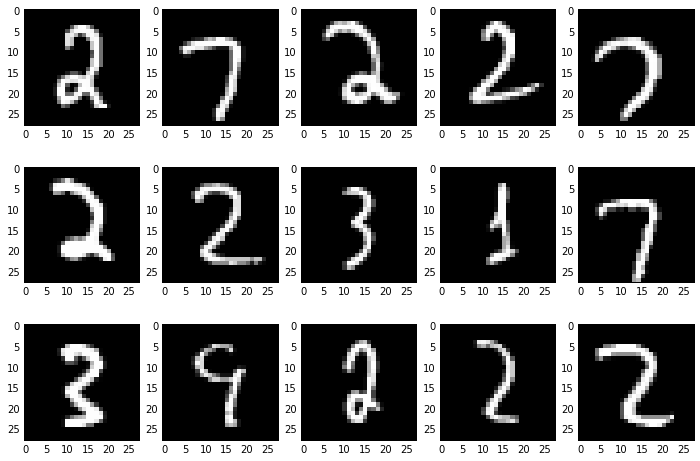

In [7]:
fig, axes = plt.subplots(3,5, figsize=(12,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[predictions == 7][i].reshape((28,28)), interpolation='nearest')
plt.show()

The performance here is very poor. We really need to train with more samples and for more epochs.

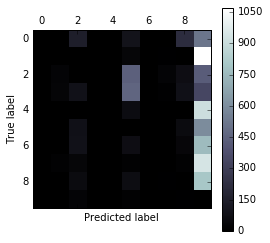

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

np.fill_diagonal(cm, 0)

plt.bone()
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Building a model on the NIH HPC

The [high performance computing group at NIH](https://hpc.nih.gov/) provides GPU equipped nodes on their GPU partition. This is an easy way to begin leveraging GPUs without the startup costs and maintainance requirements. 

Utilizing these nodes is relatively straightforward . . . on the NIH network. Unfortunately a demo isn't going to be possible, so instead we will walk through the steps I an using on a current project.

### Building a model on the Amazon EC2 service

If you don't have access to the NIH HPC resources and don't want to buy a GPU there are a number of [cloud services](http://www.nvidia.com/object/gpu-cloud-computing-services.html) with GPU enabled machines available for rent. Probably the most well known service is Amazon Web services, and specifically their [EC2 service](https://aws.amazon.com/ec2).

Anyone (willing to pay) can use these services, so time for a demo . . .

We will be using the [Bitfusion AMI](https://aws.amazon.com/marketplace/fulfillment?productId=dd1e96f9-9ede-4ff5-be40-3419bfca03a3&launch=manualLaunch). Installation of the required drivers and software requires multiple steps, and this image has everything we need pre-configured.